In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine
from explain_core.ModelEngine import ModelEngine

# instantiate a modelengine instance
model = ModelEngine()

# inject a model definition into the modelengine instance
model.load_model_definition("definitions/baseline_neonate.json")

# import the general mode interface and instantiate it with the current model object
from explain_core.interfaces.BaseInterface import BaseInterface

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
io = BaseInterface(model)

/opt/homebrew/Cellar/pypy3.10/7.3.15/libexec/lib/pypy3.10/site-packages/setuptools-59.8.0-py3.10.egg/setuptools/dist.py:723: UserWarning: Usage of dash-separated 'install-scripts' will not be supported in future versions. Please use the underscore name 'install_scripts' instead
  warnings.warn(


 Model 'baseline neonate' loaded and initialized correctly.


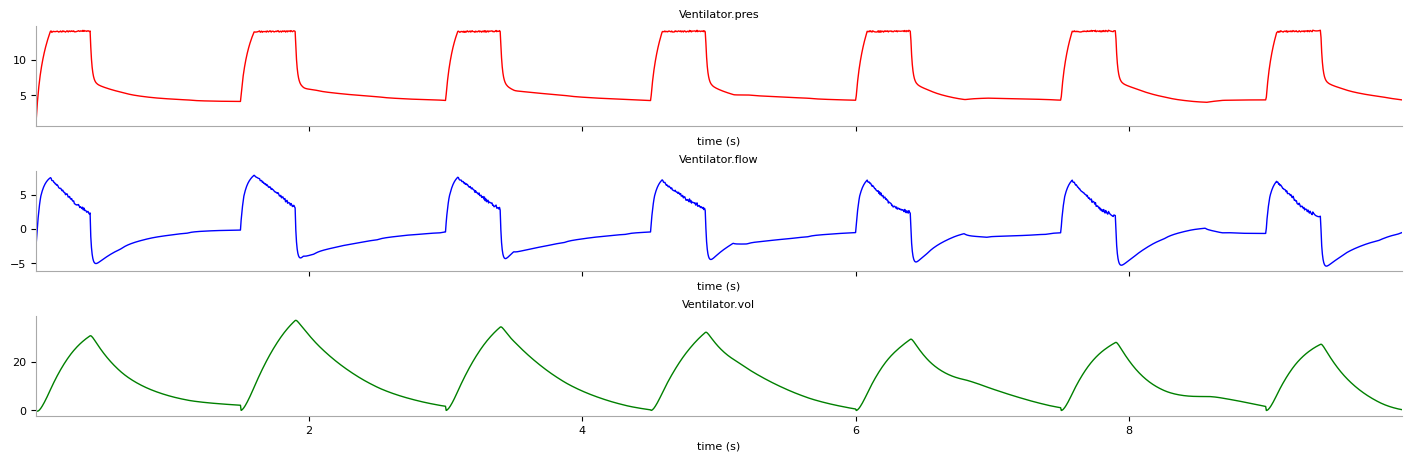

Ventilator.pres : max   14.15899, min    1.32073, mean    5.60015 mmHg
Ventilator.flow : net   44.28369, forward 1313.22115, backward -1268.93746 ml/min
Ventilator.vol  : max 37031.34533, min -295.46315 ml


In [2]:
model.models["Ventilator"].switch_ventilator(True)
model.models["Ventilator"].set_ventilator_pc()
pressures = io.plot_time_graph(
    ["Ventilator.pres", "Ventilator.flow", "Ventilator.vol"],
    autoscale=True,
    fill=False,
    combined=False,
    sharey=False,
    time_to_calculate=10,
)

In [ ]:
model.models["VENT_INSP_VALVE"]

In [ ]:
pressures = io.plot_time_graph(
    [
        "VENT_GASCIRCUIT.is_enabled",
        "VENT_EXP_VALVE.is_enabled",
        "VENT_INSP_VALVE.is_enabled",
        "VENT_EXP_VALVE.is_enabled",
    ],
    autoscale=True,
    fill=False,
    combined=False,
    sharey=False,
    time_to_calculate=10,
)

In [12]:
t = io.calculate(60)

ZeroDivisionError: float division by zero

In [11]:
model.models["Ventilator"].is_enabled = False
model.models["Ecls"].is_enabled = False